In [765]:
  #import libraries 
    
import pandas as pd
import requests
from bs4 import BeautifulSoup as BS
import numpy as np
import re  

  
from shapely.geometry import Point
import geopandas as gpd
import matplotlib.pyplot as plt
import folium

In [766]:
# create a Request object for the wikipedia page for the Turing Award
response = requests.get('https://en.wikipedia.org/wiki/List_of_deadly_earthquakes_since_1900')

# read the resulting HTML into a variable called result_text
result_text = response.text

In [767]:
print(type(response))

print(type(result_text))

<class 'requests.models.Response'>
<class 'str'>


In [768]:
result_text

'<!DOCTYPE html>\n<html class="client-nojs" lang="en" dir="ltr">\n<head>\n<meta charset="UTF-8"/>\n<title>List of deadly earthquakes since 1900 - Wikipedia</title>\n<script>document.documentElement.className = document.documentElement.className.replace( /(^|\\s)client-nojs(\\s|$)/, "$1client-js$2" );</script>\n<script>(window.RLQ=window.RLQ||[]).push(function(){mw.config.set({"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":false,"wgNamespaceNumber":0,"wgPageName":"List_of_deadly_earthquakes_since_1900","wgTitle":"List of deadly earthquakes since 1900","wgCurRevisionId":840128723,"wgRevisionId":840128723,"wgArticleId":11673441,"wgIsArticle":true,"wgIsRedirect":false,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["Articles needing additional references from July 2017","All articles needing additional references","Articles needing cleanup from July 2017","All pages needing cleanup","Cleanup tagged articles with a reason field from July 2017","Wikipedia pag

In [769]:
# create the soup by constructing a BS object from the html page and the appropriate parser
soup = BS(result_text, 'html.parser')

In [770]:
soup.title

<title>List of deadly earthquakes since 1900 - Wikipedia</title>

In [771]:
print(soup.prettify())

<!DOCTYPE html>
<html class="client-nojs" dir="ltr" lang="en">
 <head>
  <meta charset="utf-8"/>
  <title>
   List of deadly earthquakes since 1900 - Wikipedia
  </title>
  <script>
   document.documentElement.className = document.documentElement.className.replace( /(^|\s)client-nojs(\s|$)/, "$1client-js$2" );
  </script>
  <script>
   (window.RLQ=window.RLQ||[]).push(function(){mw.config.set({"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":false,"wgNamespaceNumber":0,"wgPageName":"List_of_deadly_earthquakes_since_1900","wgTitle":"List of deadly earthquakes since 1900","wgCurRevisionId":840128723,"wgRevisionId":840128723,"wgArticleId":11673441,"wgIsArticle":true,"wgIsRedirect":false,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["Articles needing additional references from July 2017","All articles needing additional references","Articles needing cleanup from July 2017","All pages needing cleanup","Cleanup tagged articles with a reason field from July 20

In [772]:
# My_table = soup.find('table',{'class':'wikitable sortable'})



In [773]:
# find a table 

table=soup.findAll('table',attrs={'class':'sortable wikitable'})


In [774]:
table

[<table class="sortable wikitable">
 <tbody><tr bgcolor="#CCCCCC">
 <th width="22%">Origin (<a class="mw-redirect" href="/wiki/UTC" title="UTC">UTC</a>)</th>
 <th width="33%">Present-day country and link to Wikipedia article</th>
 <th width="10%"><a href="/wiki/Latitude" title="Latitude">Lat</a></th>
 <th width="10%"><a href="/wiki/Longitude" title="Longitude">Long</a></th>
 <th width="8%">Depth (<a class="mw-redirect" href="/wiki/Km" title="Km">km</a>)</th>
 <th width="6%">Magnitude</th>
 <th width="9%">Secondary Effects</th>
 <th width="10%">PDE Shaking Deaths</th>
 <th width="10%">PDE Total Deaths</th>
 <th width="10%">Utsu Total Deaths</th>
 <th width="10%">EM-DAT Total Deaths</th>
 <th width="12%">Other Source Deaths
 </th></tr>
 <tr>
 <td>1900-05-11 17:23</td>
 <td>Japan</td>
 <td>38.700</td>
 <td>141.100</td>
 <td>5</td>
 <td>7.0 <a href="/wiki/Seismic_magnitude_scales#Mjma" title="Seismic magnitude scales"><span title="JMA mag.">M<sub>JMA</sub></span></a></td>
 <td></td>
 <td><

In [775]:
# find table row

table_rows=table[0].findAll('tr')

In [776]:
table_rows

[<tr bgcolor="#CCCCCC">
 <th width="22%">Origin (<a class="mw-redirect" href="/wiki/UTC" title="UTC">UTC</a>)</th>
 <th width="33%">Present-day country and link to Wikipedia article</th>
 <th width="10%"><a href="/wiki/Latitude" title="Latitude">Lat</a></th>
 <th width="10%"><a href="/wiki/Longitude" title="Longitude">Long</a></th>
 <th width="8%">Depth (<a class="mw-redirect" href="/wiki/Km" title="Km">km</a>)</th>
 <th width="6%">Magnitude</th>
 <th width="9%">Secondary Effects</th>
 <th width="10%">PDE Shaking Deaths</th>
 <th width="10%">PDE Total Deaths</th>
 <th width="10%">Utsu Total Deaths</th>
 <th width="10%">EM-DAT Total Deaths</th>
 <th width="12%">Other Source Deaths
 </th></tr>, <tr>
 <td>1900-05-11 17:23</td>
 <td>Japan</td>
 <td>38.700</td>
 <td>141.100</td>
 <td>5</td>
 <td>7.0 <a href="/wiki/Seismic_magnitude_scales#Mjma" title="Seismic magnitude scales"><span title="JMA mag.">M<sub>JMA</sub></span></a></td>
 <td></td>
 <td></td>
 <td></td>
 <td></td>
 <td></td>
 <td>

In [777]:
# define a function to identify table head(th) and table data(td)

data=[]

for ind, tr in enumerate(table_rows):
    tag='td' if ind else 'th'
    row=[elem.text for elem in tr.findAll(tag)]
    data.append(row)
earthquakes_df=pd.DataFrame(data[1:],columns=data[0])
earthquakes_df.head()

Origin (UTC) Present-day country and link to Wikipedia article     Lat  \
0  1900-05-11 17:23                                             Japan  38.700   
1  1900-07-12 06:25                                            Turkey  40.300   
2  1900-10-29 09:11                                         Venezuela  11.000   
3  1901-02-15 00:00                                             China  26.000   
4  1901-03-31 07:11                                          Bulgaria  43.400   

      Long Depth (km) Magnitude Secondary Effects PDE Shaking Deaths  \
0  141.100          5  7.0 MJMA                                        
1   43.100              5.9 Muk                                        
2  -66.000          0    7.7 Mw                                        
3  100.100          0    6.5 Ms                                        
4   28.700              6.4 Muk                                        

  PDE Total Deaths Utsu Total Deaths EM-DAT Total Deaths Other Source Deaths\n  
0                                                                           \n  
1                                140                                        \n  
2                                                                           \n  
3                                                                           \n  
4                                  4                                        \n

In [778]:
# remove \n string with empty string

earthquakes_df['Other Source Deaths\n']=earthquakes_df['Other Source Deaths\n'].str.replace('\n','')

In [779]:
earthquakes_df=earthquakes_df.replace("", np.nan)
earthquakes_df.head()

Origin (UTC) Present-day country and link to Wikipedia article     Lat  \
0  1900-05-11 17:23                                             Japan  38.700   
1  1900-07-12 06:25                                            Turkey  40.300   
2  1900-10-29 09:11                                         Venezuela  11.000   
3  1901-02-15 00:00                                             China  26.000   
4  1901-03-31 07:11                                          Bulgaria  43.400   

      Long Depth (km) Magnitude Secondary Effects PDE Shaking Deaths  \
0  141.100          5  7.0 MJMA               NaN                NaN   
1   43.100        NaN   5.9 Muk               NaN                NaN   
2  -66.000          0    7.7 Mw               NaN                NaN   
3  100.100          0    6.5 Ms               NaN                NaN   
4   28.700        NaN   6.4 Muk               NaN                NaN   

  PDE Total Deaths Utsu Total Deaths EM-DAT Total Deaths Other Source Deaths\n  
0              NaN               NaN                 NaN                   NaN  
1              NaN               140                 NaN                   NaN  
2              NaN               NaN                 NaN                   NaN  
3              NaN               NaN                 NaN                   NaN  
4              NaN                 4                 NaN                   NaN

In [780]:
# see the column names
earthquakes_df.columns

Index(['Origin (UTC)', 'Present-day country and link to Wikipedia article',
       'Lat', 'Long', 'Depth (km)', 'Magnitude', 'Secondary Effects',
       'PDE Shaking Deaths', 'PDE Total Deaths', 'Utsu Total Deaths',
       'EM-DAT Total Deaths', 'Other Source Deaths\n'],
      dtype='object')

In [781]:
# replace the + sign at the end of numbers on 'Other Source Deaths\n' column

earthquakes_df['Other Source Deaths\n']=earthquakes_df['Other Source Deaths\n'].str.replace('+','')

In [782]:
# remove anything in closed bracket and including the bracket itself.
earthquakes_df['Other Source Deaths\n']=earthquakes_df['Other Source Deaths\n'].replace('\[\d+\]','',regex=True)

In [783]:
earthquakes_df['Other Source Deaths\n'].unique()

array([nan, '3500', '8000', '46', '164', '1500', '105000', '1404', '1',
       '120', '200', None, '380', '2041', '33', '45000', '2489',
       '26271 26000', '68', '231000* 283000* 227898*', '41', '60', '215',
       '34', '295', '79', '189', '1,115', '222,517', '521', '42', '2,698',
       '181', '15894', '150', '111', '601 (as of October 30, 2011)'],
      dtype=object)

In [784]:
# remove everything in the parenthesis

earthquakes_df['Other Source Deaths\n']=earthquakes_df['Other Source Deaths\n'].replace('\(.*?\)','',regex=True)

In [785]:
earthquakes_df['Other Source Deaths\n'].unique()

array([nan, '3500', '8000', '46', '164', '1500', '105000', '1404', '1',
       '120', '200', None, '380', '2041', '33', '45000', '2489',
       '26271 26000', '68', '231000* 283000* 227898*', '41', '60', '215',
       '34', '295', '79', '189', '1,115', '222,517', '521', '42', '2,698',
       '181', '15894', '150', '111', '601 '], dtype=object)

In [786]:
# remove * from the string 

earthquakes_df['Other Source Deaths\n']=earthquakes_df['Other Source Deaths\n'].replace(r'\*',value='',regex=True)

In [787]:
earthquakes_df['Other Source Deaths\n'].unique()

array([nan, '3500', '8000', '46', '164', '1500', '105000', '1404', '1',
       '120', '200', None, '380', '2041', '33', '45000', '2489',
       '26271 26000', '68', '231000 283000 227898', '41', '60', '215',
       '34', '295', '79', '189', '1,115', '222,517', '521', '42', '2,698',
       '181', '15894', '150', '111', '601 '], dtype=object)

In [788]:
# replace  three values listed with average of the three.

earthquakes_df['Other Source Deaths\n']=earthquakes_df['Other Source Deaths\n'].str.replace('231000 283000 227898','247299')

In [789]:


earthquakes_df['Other Source Deaths\n']=earthquakes_df['Other Source Deaths\n'].str.replace('26271 26000','26136')

earthquakes_df['Other Source Deaths\n']=earthquakes_df['Other Source Deaths\n'].str.replace(',','')

In [790]:
earthquakes_df['Other Source Deaths\n'].unique()

array([nan, '3500', '8000', '46', '164', '1500', '105000', '1404', '1',
       '120', '200', None, '380', '2041', '33', '45000', '2489', '26136',
       '68', '247299', '41', '60', '215', '34', '295', '79', '189',
       '1115', '222517', '521', '42', '2698', '181', '15894', '150',
       '111', '601 '], dtype=object)

In [791]:
# replace  5 ML with 5.0 ML  in magnitude column

earthquakes_df.Magnitude=earthquakes_df.Magnitude.str.replace('5 ML','5.0 ML')

In [792]:
# make sure 5 ML is replaced 
earthquakes_df[earthquakes_df.Magnitude.str[0]=='5 ML']

Empty DataFrame
Columns: [Origin (UTC), Present-day country and link to Wikipedia article, Lat, Long, Depth (km), Magnitude, Secondary Effects, PDE Shaking Deaths, PDE Total Deaths, Utsu Total Deaths, EM-DAT Total Deaths, Other Source Deaths
]
Index: []

In [793]:
# take only numbers from magnitude column
earthquakes_df.Magnitude=earthquakes_df.Magnitude.str.extract('(\d+\.\d+)')
pd.to_numeric(earthquakes_df.Magnitude)
earthquakes_df

Origin (UTC) Present-day country and link to Wikipedia article  \
0     1900-05-11 17:23                                             Japan   
1     1900-07-12 06:25                                            Turkey   
2     1900-10-29 09:11                                         Venezuela   
3     1901-02-15 00:00                                             China   
4     1901-03-31 07:11                                          Bulgaria   
5     1901-08-09 09:23                                             Japan   
6     1901-11-15 20:15         New Zealand (see 1901 Cheviot earthquake)   
7     1902-01-30 14:01                                             Japan   
8     1902-02-13 09:39                                        Azerbaijan   
9     1902-03-09 07:46                                            Turkey   
10    1902-04-19 02:23         Guatemala (see 1902 Guatemala earthquake)   
11    1902-07-03 15:36                                             China   
12    1902-08-22 03:00                                             China   
13          1902-09-19                                         Australia   
14    1902-12-16 05:07                                        Uzbekistan   
15    1903-03-29 22:30                                 Judea and Samaria   
16          1903-04-28            Turkey (see 1903 Manzikert earthquake)   
17    1903-05-28 03:58                                            Turkey   
18    1903-08-11 04:32                                            Greece   
19    1903-09-25 01:20                                              Iran   
20    1904-04-24 06:39                                            Taiwan   
21    1904-08-11 05:56                                            Greece   
22    1904-08-30 11:42                                             China   
23    1904-11-05 20:25               Taiwan (see 1904 Douliu earthquake)   
24    1905-04-04 00:50                                             India   
25    1905-06-01 04:42                                           Albania   
26    1905-06-02 05:39                                             Japan   
27    1905-09-08 01:43              Italy (see 1905 Calabria earthquake)   
28    1905-11-08 22:06                                            Greece   
29    1906-01-31 15:36    Ecuador (see 1906 Ecuador–Colombia earthquake)   
...                ...                                               ...   
1310  2008-05-25 08:21                                             China   
1311  2008-06-06 20:02                                           Algeria   
1312  2008-06-08 12:25          Greece (see 2008 Peloponnese earthquake)   
1313  2008-06-13 23:43  Japan (see 2008 Iwate–Miyagi Nairiku earthquake)   
1314  2008-06-17 05:51                                             China   
1315  2008-07-15 03:26           Greece (see 2008 Dodecanese earthquake)   
1316  2008-08-21 12:24            China (see 2008 Yingjiang earthquakes)   
1317   2008-08-30 8:30             China (see 2008 Panzhihua earthquake)   
1318  2008-10-05 15:52       Kyrgyzstan (see 2008 Kyrgyzstan earthquake)   
1319  2008-10-06 16:30               China (see 2008 Damxung earthquake)   
1320  2008-10-28 23:09             Pakistan (see 2008 Ziarat earthquake)   
1321  2009-01-08 19:21         Costa Rica (see 2009 Cinchona earthquake)   
1322  2009-04-06 03:32              Italy (see 2009 L'Aquila earthquake)   
1323  2009-07-09 11:19                China (see 2009 Yunnan earthquake)   
1324  2009-08-10 20:07              Japan (see 2009 Shizuoka earthquake)   
1325  2009-09-02 07:55         Indonesia (see 2009 West Java earthquake)   
1326  2009-09-29 17:48     Samoa (see 2009 Samoa earthquake and tsunami)   
1327  2009-09-30 10:16            Indonesia (see 2009 Padang earthquake)   
1328  2010-01-12 17:00                 Haiti (see 2010 Haiti earthquake)   
1329  2010-02-27 06:34                 Chile (see 2010 Chile earthquake)   
1330  2010-03-08 02:32               Turkey (see 2010 Elâz

In [794]:
earthquakes_df.columns

Index(['Origin (UTC)', 'Present-day country and link to Wikipedia article',
       'Lat', 'Long', 'Depth (km)', 'Magnitude', 'Secondary Effects',
       'PDE Shaking Deaths', 'PDE Total Deaths', 'Utsu Total Deaths',
       'EM-DAT Total Deaths', 'Other Source Deaths\n'],
      dtype='object')

In [795]:
earthquakes_df['EM-DAT Total Deaths']=earthquakes_df['EM-DAT Total Deaths'].str.replace('\n','')
earthquakes_df['EM-DAT Total Deaths']=earthquakes_df['EM-DAT Total Deaths'].replace('\[\d+\]','',regex=True)
earthquakes_df['EM-DAT Total Deaths']=earthquakes_df['EM-DAT Total Deaths'].str.replace('|','')

In [796]:
earthquakes_df.info

<bound method DataFrame.info of           Origin (UTC) Present-day country and link to Wikipedia article  \
0     1900-05-11 17:23                                             Japan   
1     1900-07-12 06:25                                            Turkey   
2     1900-10-29 09:11                                         Venezuela   
3     1901-02-15 00:00                                             China   
4     1901-03-31 07:11                                          Bulgaria   
5     1901-08-09 09:23                                             Japan   
6     1901-11-15 20:15         New Zealand (see 1901 Cheviot earthquake)   
7     1902-01-30 14:01                                             Japan   
8     1902-02-13 09:39                                        Azerbaijan   
9     1902-03-09 07:46                                            Turkey   
10    1902-04-19 02:23         Guatemala (see 1902 Guatemala earthquake)   
11    1902-07-03 15:36                                  

In [797]:
earthquakes_df.loc[1327]

Origin (UTC)                                                               2009-09-30 10:16
Present-day country and link to Wikipedia article    Indonesia (see 2009 Padang earthquake)
Lat                                                                                     NaN
Long                                                                                    NaN
Depth (km)                                                                              NaN
Magnitude                                                                               7.6
Secondary Effects                                                                       NaN
PDE Shaking Deaths                                                                      NaN
PDE Total Deaths                                                                        NaN
Utsu Total Deaths                                                                       NaN
EM-DAT Total Deaths                                                             

In [798]:
earthquakes_df['EM-DAT Total Deaths']=pd.to_numeric(earthquakes_df['EM-DAT Total Deaths'])
earthquakes_df['Utsu Total Deaths']=pd.to_numeric(earthquakes_df['Utsu Total Deaths'])
earthquakes_df['PDE Total Deaths']=pd.to_numeric(earthquakes_df['PDE Total Deaths'])
earthquakes_df['Other Source Deaths'] =pd.to_numeric(earthquakes_df['Other Source Deaths\n'])



In [799]:
earthquakes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1340 entries, 0 to 1339
Data columns (total 13 columns):
Origin (UTC)                                         1340 non-null object
Present-day country and link to Wikipedia article    1340 non-null object
Lat                                                  1326 non-null object
Long                                                 1326 non-null object
Depth (km)                                           1250 non-null object
Magnitude                                            1339 non-null object
Secondary Effects                                    373 non-null object
PDE Shaking Deaths                                   739 non-null object
PDE Total Deaths                                     750 non-null float64
Utsu Total Deaths                                    1027 non-null float64
EM-DAT Total Deaths                                  560 non-null float64
Other Source Deaths
                                 37 non-null object
Other So

In [800]:
# create new 'deaths' column  comparing the four death columns and take the highest

earthquakes_df['deaths']=earthquakes_df[['PDE Total Deaths', 'Utsu Total Deaths',
       'EM-DAT Total Deaths', 'Other Source Deaths\n']].max(axis=1)

In [801]:
earthquakes_df.head()

Origin (UTC) Present-day country and link to Wikipedia article     Lat  \
0  1900-05-11 17:23                                             Japan  38.700   
1  1900-07-12 06:25                                            Turkey  40.300   
2  1900-10-29 09:11                                         Venezuela  11.000   
3  1901-02-15 00:00                                             China  26.000   
4  1901-03-31 07:11                                          Bulgaria  43.400   

      Long Depth (km) Magnitude Secondary Effects PDE Shaking Deaths  \
0  141.100          5       7.0               NaN                NaN   
1   43.100        NaN       5.9               NaN                NaN   
2  -66.000          0       7.7               NaN                NaN   
3  100.100          0       6.5               NaN                NaN   
4   28.700        NaN       6.4               NaN                NaN   

   PDE Total Deaths  Utsu Total Deaths  EM-DAT Total Deaths  \
0               NaN                NaN                  NaN   
1               NaN              140.0                  NaN   
2               NaN                NaN                  NaN   
3               NaN                NaN                  NaN   
4               NaN                4.0                  NaN   

  Other Source Deaths\n  Other Source Deaths  deaths  
0                   NaN                  NaN     NaN  
1                   NaN                  NaN   140.0  
2                   NaN                  NaN     NaN  
3                   NaN                  NaN     NaN  
4                   NaN                  NaN     4.0

# check type of data

In [802]:
earthquakes_df['Present-day country and link to Wikipedia article'].unique()

array(['Japan', 'Turkey', 'Venezuela', 'China', 'Bulgaria',
       'New Zealand (see 1901 Cheviot earthquake)', 'Azerbaijan',
       'Guatemala (see 1902 Guatemala earthquake)', 'Australia',
       'Uzbekistan', 'Judea and Samaria',
       'Turkey (see 1903 Manzikert earthquake)', 'Greece', 'Iran',
       'Taiwan', 'Taiwan (see 1904 Douliu earthquake)', 'India',
       'Albania', 'Italy (see 1905 Calabria earthquake)',
       'Ecuador (see 1906 Ecuador–Colombia earthquake)',
       'Taiwan (see 1906 Meishan earthquake)',
       'United States (see 1906 San Francisco earthquake)',
       'Chile (see 1906 Valparaíso earthquake)', 'Indonesia',
       'Jamaica (see 1907 Kingston earthquake)', 'Mexico', 'Philippines',
       'Tajikistan (see 1907 Qaratog earthquake)',
       'Italy (see 1908 Messina earthquake)',
       'Iran (see 1909 Borujerd earthquake)', 'Portugal',
       'France (see 1909 Provence earthquake)', 'Pakistan', 'Algeria',
       'Kazakhstan (see 1911 Kebin earthquake)', 'K

In [803]:
earthquakes_df['Country']=earthquakes_df['Present-day country and link to Wikipedia article'].str.extract('(\D+\D+\()')

In [804]:
earthquakes_df.Country

0                 NaN
1                 NaN
2                 NaN
3                 NaN
4                 NaN
5                 NaN
6       New Zealand (
7                 NaN
8                 NaN
9                 NaN
10        Guatemala (
11                NaN
12                NaN
13                NaN
14                NaN
15                NaN
16           Turkey (
17                NaN
18                NaN
19                NaN
20                NaN
21                NaN
22                NaN
23           Taiwan (
24                NaN
25                NaN
26                NaN
27            Italy (
28                NaN
29          Ecuador (
            ...      
1310              NaN
1311              NaN
1312         Greece (
1313          Japan (
1314              NaN
1315         Greece (
1316          China (
1317          China (
1318     Kyrgyzstan (
1319          China (
1320       Pakistan (
1321     Costa Rica (
1322          Italy (
1323          China (
1324      

In [805]:
# to extract only names of the countries

earthquakes_df['Country']=earthquakes_df['Present-day country and link to Wikipedia article']\
    .str.split('(')\
    .apply(lambda x:x[0])\
    .str.strip()  

In [806]:
earthquakes_df['Country'].unique()

array(['Japan', 'Turkey', 'Venezuela', 'China', 'Bulgaria', 'New Zealand',
       'Azerbaijan', 'Guatemala', 'Australia', 'Uzbekistan',
       'Judea and Samaria', 'Greece', 'Iran', 'Taiwan', 'India',
       'Albania', 'Italy', 'Ecuador', 'United States', 'Chile',
       'Indonesia', 'Jamaica', 'Mexico', 'Philippines', 'Tajikistan',
       'Portugal', 'France', 'Pakistan', 'Algeria', 'Kazakhstan',
       'Kyrgyzstan', 'Iceland', 'Burma', 'Peru', 'El Salvador',
       'Colombia', 'Russian Federation', 'Puerto Rico',
       'Papua New Guinea', 'Georgia', 'Argentina', 'Eritrea',
       'Bangladesh', 'Nicaragua', 'Mandatory Palestine and Transjordan',
       'Turkmenistan', 'Saint Pierre and Miquelon',
       'Kingdom of Yugoslavia', 'Armenia', 'England', 'Solomon Islands',
       'Cuba', 'Nepal', 'Ghana', 'Romania', 'Yemen', 'Canada',
       'Dominican Republic', 'Tajik Soviet Socialist Republic', 'Haiti',
       'Cyprus', 'Fiji', 'Egypt', 'Costa Rica', 'Hungary',
       'Syrian Arab Repu

In [807]:
earthquakes_df

Origin (UTC) Present-day country and link to Wikipedia article  \
0     1900-05-11 17:23                                             Japan   
1     1900-07-12 06:25                                            Turkey   
2     1900-10-29 09:11                                         Venezuela   
3     1901-02-15 00:00                                             China   
4     1901-03-31 07:11                                          Bulgaria   
5     1901-08-09 09:23                                             Japan   
6     1901-11-15 20:15         New Zealand (see 1901 Cheviot earthquake)   
7     1902-01-30 14:01                                             Japan   
8     1902-02-13 09:39                                        Azerbaijan   
9     1902-03-09 07:46                                            Turkey   
10    1902-04-19 02:23         Guatemala (see 1902 Guatemala earthquake)   
11    1902-07-03 15:36                                             China   
12    1902-08-22 03:00                                             China   
13          1902-09-19                                         Australia   
14    1902-12-16 05:07                                        Uzbekistan   
15    1903-03-29 22:30                                 Judea and Samaria   
16          1903-04-28            Turkey (see 1903 Manzikert earthquake)   
17    1903-05-28 03:58                                            Turkey   
18    1903-08-11 04:32                                            Greece   
19    1903-09-25 01:20                                              Iran   
20    1904-04-24 06:39                                            Taiwan   
21    1904-08-11 05:56                                            Greece   
22    1904-08-30 11:42                                             China   
23    1904-11-05 20:25               Taiwan (see 1904 Douliu earthquake)   
24    1905-04-04 00:50                                             India   
25    1905-06-01 04:42                                           Albania   
26    1905-06-02 05:39                                             Japan   
27    1905-09-08 01:43              Italy (see 1905 Calabria earthquake)   
28    1905-11-08 22:06                                            Greece   
29    1906-01-31 15:36    Ecuador (see 1906 Ecuador–Colombia earthquake)   
...                ...                                               ...   
1310  2008-05-25 08:21                                             China   
1311  2008-06-06 20:02                                           Algeria   
1312  2008-06-08 12:25          Greece (see 2008 Peloponnese earthquake)   
1313  2008-06-13 23:43  Japan (see 2008 Iwate–Miyagi Nairiku earthquake)   
1314  2008-06-17 05:51                                             China   
1315  2008-07-15 03:26           Greece (see 2008 Dodecanese earthquake)   
1316  2008-08-21 12:24            China (see 2008 Yingjiang earthquakes)   
1317   2008-08-30 8:30             China (see 2008 Panzhihua earthquake)   
1318  2008-10-05 15:52       Kyrgyzstan (see 2008 Kyrgyzstan earthquake)   
1319  2008-10-06 16:30               China (see 2008 Damxung earthquake)   
1320  2008-10-28 23:09             Pakistan (see 2008 Ziarat earthquake)   
1321  2009-01-08 19:21         Costa Rica (see 2009 Cinchona earthquake)   
1322  2009-04-06 03:32              Italy (see 2009 L'Aquila earthquake)   
1323  2009-07-09 11:19                China (see 2009 Yunnan earthquake)   
1324  2009-08-10 20:07              Japan (see 2009 Shizuoka earthquake)   
1325  2009-09-02 07:55         Indonesia (see 2009 West Java earthquake)   
1326  2009-09-29 17:48     Samoa (see 2009 Samoa earthquake and tsunami)   
1327  2009-09-30 10:16            Indonesia (see 2009 Padang earthquake)   
1328  2010-01-12 17:00                 Haiti (see 2010 Haiti earthquake)   
1329  2010-02-27 06:34                 Chile (see 2010 Chile earthquake)   
1330  2010-03-08 02:32               Turkey (see 2010 Elâz

In [808]:
# extract the Year from Origin(UTC)

earthquakes_df['Year']=earthquakes_df['Origin (UTC)'].str[:4]
earthquakes_df.head()

Origin (UTC) Present-day country and link to Wikipedia article     Lat  \
0  1900-05-11 17:23                                             Japan  38.700   
1  1900-07-12 06:25                                            Turkey  40.300   
2  1900-10-29 09:11                                         Venezuela  11.000   
3  1901-02-15 00:00                                             China  26.000   
4  1901-03-31 07:11                                          Bulgaria  43.400   

      Long Depth (km) Magnitude Secondary Effects PDE Shaking Deaths  \
0  141.100          5       7.0               NaN                NaN   
1   43.100        NaN       5.9               NaN                NaN   
2  -66.000          0       7.7               NaN                NaN   
3  100.100          0       6.5               NaN                NaN   
4   28.700        NaN       6.4               NaN                NaN   

   PDE Total Deaths  Utsu Total Deaths  EM-DAT Total Deaths  \
0               NaN                NaN                  NaN   
1               NaN              140.0                  NaN   
2               NaN                NaN                  NaN   
3               NaN                NaN                  NaN   
4               NaN                4.0                  NaN   

  Other Source Deaths\n  Other Source Deaths  deaths    Country  Year  
0                   NaN                  NaN     NaN      Japan  1900  
1                   NaN                  NaN   140.0     Turkey  1900  
2                   NaN                  NaN     NaN  Venezuela  1900  
3                   NaN                  NaN     NaN      China  1901  
4                   NaN                  NaN     4.0   Bulgaria  1901

In [809]:
# there is ? string that is probting to convert it into numeric
earthquakes_df.loc[413]

Origin (UTC)                                                               1963-06-26 04:17
Present-day country and link to Wikipedia article    Macedonia (see 1963 Skopje earthquake)
Lat                                                                                       ?
Long                                                                                     ??
Depth (km)                                                                                ?
Magnitude                                                                               6.1
Secondary Effects                                                                       NaN
PDE Shaking Deaths                                                                      NaN
PDE Total Deaths                                                                       1100
Utsu Total Deaths                                                                       NaN
EM-DAT Total Deaths                                                             

In [812]:
earthquakes_df['Depth (km)']=earthquakes_df['Depth (km)'].str.replace('?','')

In [813]:
# convert depth to numeric
earthquakes_df['Depth (km)']=pd.to_numeric(earthquakes_df['Depth (km)'])

In [815]:
# convert to numerical values

earthquakes_df['Magnitude']=pd.to_numeric(earthquakes_df['Magnitude'])

In [816]:
# take selected columns
Death_country=earthquakes_df.loc[:,['Country','Year','Depth (km)','Magnitude','deaths']]
Death_country.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1340 entries, 0 to 1339
Data columns (total 5 columns):
Country       1340 non-null object
Year          1340 non-null object
Depth (km)    1249 non-null float64
Magnitude     1339 non-null float64
deaths        1245 non-null float64
dtypes: float64(3), object(2)
memory usage: 52.4+ KB


In [817]:
grouped_by_country=Death_country.groupby(['Country','Year']).sum()
grouped_by_country.head()

Depth (km)  Magnitude  deaths
Country     Year                               
            1997        10.0        6.9    81.0
Afghanistan 1956        35.0        7.6   350.0
            1972        31.1        6.1    11.0
            1976        18.2        5.6    50.0
            1978        10.2        6.1     1.0

In [818]:
grouped_by_country=grouped_by_country.reset_index()

In [819]:
grouped_by_country.sort_values(['Country','Year'],axis=0).head()

Country  Year  Depth (km)  Magnitude  deaths
0               1997        10.0        6.9    81.0
1  Afghanistan  1956        35.0        7.6   350.0
2  Afghanistan  1972        31.1        6.1    11.0
3  Afghanistan  1976        18.2        5.6    50.0
4  Afghanistan  1978        10.2        6.1     1.0

### for shallower  source of the earth quakes the magnitude of  scales ranges from 2 to 10
### the relationship is not clear

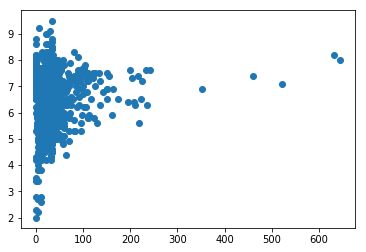

In [820]:
# Depth vs Magnitude

plt.scatter(Death_country['Depth (km)'],Death_country.Magnitude)


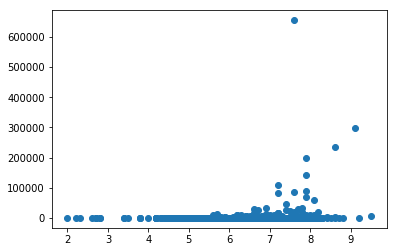

In [821]:
# magnitude of the quakes vs deaths 
plt.scatter(Death_country.Magnitude,Death_country.deaths)

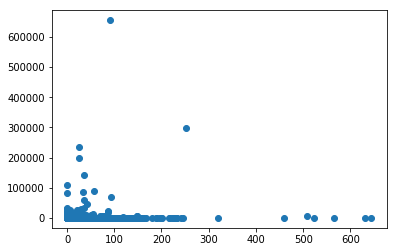

In [822]:
# if depth of the source of the earth quake makes the destruction less?

plt.scatter(grouped_by_country['Depth (km)'],grouped_by_country.deaths)

In [823]:
# take only three columns
deaths_by_country=Death_country.loc[:,['Country','Year','deaths']]

In [824]:
# count earthquakes events per country

earthquake_occurrence=Death_country.loc[:,['Country','Year']]
count_earthquakes=earthquake_occurrence.groupby('Country').count()
count_earthquakes.rename(columns={'Year':"Count"},inplace=True)
count_earthquakes.sort_values("Count",ascending=False).head(10)

Count
Country         
China        166
Indonesia     96
Turkey        95
Iran          91
Japan         82
Peru          54
Taiwan        48
Mexico        46
Chile         44
Greece        44

In [825]:
# number of deaths by country

death_aggregate=deaths_by_country.groupby('Country').sum()

In [826]:
# sort by deaths in descending order
# See top 10 countries with highest causalities
death_aggregate.sort_values('deaths',ascending=False).head(10)

deaths
Country                
China         1281643.0
Indonesia      342380.0
Iran           169947.0
Japan          169225.0
Pakistan       157637.0
Italy          123372.0
Turkmenistan   113711.0
Turkey          91088.0
Peru            74054.0
Chile           58080.0

In [827]:
# where did the highest causlity occured
highest_death=death_aggregate.nlargest(5,'deaths')
highest_death=highest_death.reset_index()

<BarContainer object of 5 artists>

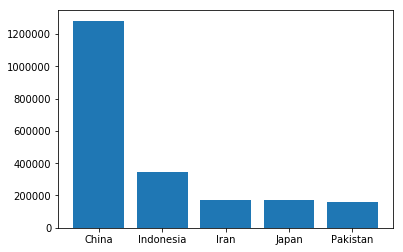

In [828]:
plt.bar(highest_death.Country,height=highest_death.deaths,width=0.8,align='center')

In [829]:
earthquakes_df.head()

Origin (UTC) Present-day country and link to Wikipedia article     Lat  \
0  1900-05-11 17:23                                             Japan  38.700   
1  1900-07-12 06:25                                            Turkey  40.300   
2  1900-10-29 09:11                                         Venezuela  11.000   
3  1901-02-15 00:00                                             China  26.000   
4  1901-03-31 07:11                                          Bulgaria  43.400   

      Long  Depth (km)  Magnitude Secondary Effects PDE Shaking Deaths  \
0  141.100         5.0        7.0               NaN                NaN   
1   43.100         NaN        5.9               NaN                NaN   
2  -66.000         0.0        7.7               NaN                NaN   
3  100.100         0.0        6.5               NaN                NaN   
4   28.700         NaN        6.4               NaN                NaN   

   PDE Total Deaths  Utsu Total Deaths  EM-DAT Total Deaths  \
0               NaN                NaN                  NaN   
1               NaN              140.0                  NaN   
2               NaN                NaN                  NaN   
3               NaN                NaN                  NaN   
4               NaN                4.0                  NaN   

  Other Source Deaths\n  Other Source Deaths  deaths    Country  Year  
0                   NaN                  NaN     NaN      Japan  1900  
1                   NaN                  NaN   140.0     Turkey  1900  
2                   NaN                  NaN     NaN  Venezuela  1900  
3                   NaN                  NaN     NaN      China  1901  
4                   NaN                  NaN     4.0   Bulgaria  1901

In [830]:
# create dummy variable for secondary effeects.
earthquakes_df['Secondary Effects'].unique()
earthquakes_df['Secondary Effects']=earthquakes_df['Secondary Effects'].str.replace('T,LF','T,L,F')

In [831]:
earthquakes_df=earthquakes_df.join(earthquakes_df['Secondary Effects'].str.get_dummies(sep=','))


In [832]:
earthquakes_df.head()

Origin (UTC) Present-day country and link to Wikipedia article     Lat  \
0  1900-05-11 17:23                                             Japan  38.700   
1  1900-07-12 06:25                                            Turkey  40.300   
2  1900-10-29 09:11                                         Venezuela  11.000   
3  1901-02-15 00:00                                             China  26.000   
4  1901-03-31 07:11                                          Bulgaria  43.400   

      Long  Depth (km)  Magnitude Secondary Effects PDE Shaking Deaths  \
0  141.100         5.0        7.0               NaN                NaN   
1   43.100         NaN        5.9               NaN                NaN   
2  -66.000         0.0        7.7               NaN                NaN   
3  100.100         0.0        6.5               NaN                NaN   
4   28.700         NaN        6.4               NaN                NaN   

   PDE Total Deaths  Utsu Total Deaths  EM-DAT Total Deaths  \
0               NaN                NaN                  NaN   
1               NaN              140.0                  NaN   
2               NaN                NaN                  NaN   
3               NaN                NaN                  NaN   
4               NaN                4.0                  NaN   

  Other Source Deaths\n  Other Source Deaths  deaths    Country  Year  F  L  \
0                   NaN                  NaN     NaN      Japan  1900  0  0   
1                   NaN                  NaN   140.0     Turkey  1900  0  0   
2                   NaN                  NaN     NaN  Venezuela  1900  0  0   
3                   NaN                  NaN     NaN      China  1901  0  0   
4                   NaN                  NaN     4.0   Bulgaria  1901  0  0   

   Lq  T  
0   0  0  
1   0  0  
2   0  0  
3   0  0  
4   0  0

In [833]:
earthquakes_T=earthquakes_df[earthquakes_df['T']==1]


In [834]:
earthquakes_T.head()

Origin (UTC) Present-day country and link to Wikipedia article  \
5   1901-08-09 09:23                                             Japan   
27  1905-09-08 01:43              Italy (see 1905 Calabria earthquake)   
29  1906-01-31 15:36    Ecuador (see 1906 Ecuador–Colombia earthquake)   
33  1906-08-17 00:40            Chile (see 1906 Valparaíso earthquake)   
35  1907-01-04 05:19                                         Indonesia   

        Lat     Long  Depth (km)  Magnitude Secondary Effects  \
5    40.500  142.500        35.0        7.2                 T   
27   39.000   16.000         0.0        6.8                 T   
29    1.000  -81.500         0.0        8.8                 T   
33  -33.000  -72.000         0.0        8.2                 T   
35    2.000   94.500        50.0        7.5                 T   

   PDE Shaking Deaths  PDE Total Deaths  Utsu Total Deaths  \
5                 NaN               NaN                NaN   
27                NaN               NaN              557.0   
29                NaN               NaN             1000.0   
33                NaN               NaN             3760.0   
35                NaN               NaN              400.0   

    EM-DAT Total Deaths Other Source Deaths\n  Other Source Deaths   deaths  \
5                   NaN                   NaN                  NaN      NaN   
27               2500.0                   NaN                  NaN   2500.0   
29                400.0                   NaN                  NaN   1000.0   
33              20000.0                   NaN                  NaN  20000.0   
35                  NaN                   NaN                  NaN    400.0   

      Country  Year  F  L  Lq  T  
5       Japan  1901  0  0   0  1  
27      Italy  1905  0  0   0  1  
29    Ecuador  1906  0  0   0  1  
33      Chile  1906  0  0   0  1  
35  Indonesia  1907  0  0   0  1

In [856]:
# take only selected columns
earthquakes_dummy=earthquakes_df.loc[:,['Country','Year','deaths','F','L','Lq','T']]

In [859]:
# count of deaths and secondary effects by category
earthquakes_dummy=earthquakes_dummy.groupby('Country').sum().sort_values('deaths',ascending=False)


# top 10 countries with counts of death and secondary effects

In [864]:
earthquakes_dummy.head(10)
earthquakes_dummy=earthquakes_dummy.reset_index()
earthquakes_dummy.head()

index    Country     deaths   F   L  Lq   T
0      0      China  1281643.0   1  12   0   0
1      1  Indonesia   342380.0   2  15   1  31
2      2       Iran   169947.0   0  13   0   0
3      3      Japan   169225.0  11  13   1  33
4      4   Pakistan   157637.0   0   7   1   1

In [836]:
# China Data

china_df=grouped_by_country[grouped_by_country.Country=='China']

In [837]:
china_df.head()

Country  Year  Depth (km)  Magnitude  deaths
127   China  1901         0.0        6.5     0.0
128   China  1902        20.0       14.4  5650.0
129   China  1904         0.0        6.8   565.0
130   China  1906         0.0        7.2   285.0
131   China  1909         0.0        6.5    19.0

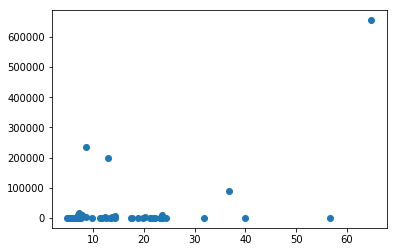

In [838]:
# does magnitude have relationship with # of deaths?

plt.scatter(china_df.Magnitude,china_df.deaths)

In [839]:
# only Indonesian data
indo_df=grouped_by_country[grouped_by_country.Country=='Indonesia']

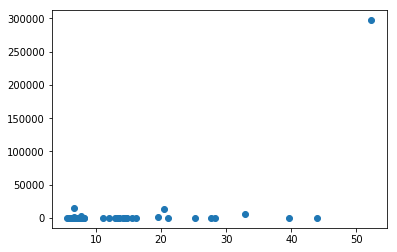

In [840]:
# does magnitude have relationship with # of deaths?

plt.scatter(indo_df.Magnitude,indo_df.deaths)

In [842]:
#earthquakes_df.loc[413]

earthquakes_df['Long']=earthquakes_df['Long'].replace('??',np.nan)

earthquakes_df['Lat']=earthquakes_df.Lat.replace('?',np.nan)

earthquakes_df['Long']=pd.to_numeric(earthquakes_df.Long,errors='coerce')
earthquakes_df['Lat']=pd.to_numeric(earthquakes_df.Lat,errors='coerce')

In [843]:
earthquakes_df.rename(columns={"Origin (UTC)":'Origin'},inplace=True)



earthquake_map=earthquakes_df

earthquake_map=earthquake_map.dropna(subset=['Lat'])
earthquakes_df['geometry'] = earthquakes_df.apply(lambda x: Point((float(x.Long), float(x.Lat))), axis=1)
earthquake_map.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1325 entries, 0 to 1339
Data columns (total 20 columns):
Origin                                               1325 non-null object
Present-day country and link to Wikipedia article    1325 non-null object
Lat                                                  1325 non-null float64
Long                                                 1325 non-null float64
Depth (km)                                           1248 non-null float64
Magnitude                                            1324 non-null float64
Secondary Effects                                    370 non-null object
PDE Shaking Deaths                                   739 non-null object
PDE Total Deaths                                     749 non-null float64
Utsu Total Deaths                                    1027 non-null float64
EM-DAT Total Deaths                                  559 non-null float64
Other Source Deaths
                                 27 non-null object
Othe

In [844]:
plate_bounds = gpd.read_file('tectonic_boundaries.geojson')

In [845]:
plate_bounds.head()

cartodb_id        type plateb platea                         source   name  \
0           4                 AN     SO           Lemaux et al. [2002]  SO-AN   
1           6                 IN     SO          Mueller et al. [1987]  SO-IN   
2          27  subduction     SA     AN            by Peter Bird, 1999  AN\SA   
3          31                 AU     TI  by Peter Bird, September 2001  TI-AU   
4          57  subduction     SA     CA            by Peter Bird, 1999  CA/SA   

            layer                                           geometry  
0  plate boundary  (LINESTRING (32.1258 -46.9998, 33.1739 -47.264...  
1  plate boundary  (LINESTRING (58.2392 12.7455, 57.8675 13.0023,...  
2  plate boundary  (LINESTRING (-76.4833 -52.0684, -76.6256999999...  
3  plate boundary  (LINESTRING (131.415 -8.267469999999999, 131.8...  
4  plate boundary  (LINESTRING (-58.1571 10.1597, -57.7617 10.634...

In [846]:
earthquake_geo = gpd.GeoDataFrame(earthquake_map, crs = plate_bounds.crs, geometry = earthquakes_df['geometry'])

In [847]:
earthquakes_df.columns

Index(['Origin', 'Present-day country and link to Wikipedia article', 'Lat',
       'Long', 'Depth (km)', 'Magnitude', 'Secondary Effects',
       'PDE Shaking Deaths', 'PDE Total Deaths', 'Utsu Total Deaths',
       'EM-DAT Total Deaths', 'Other Source Deaths\n', 'Other Source Deaths',
       'deaths', 'Country', 'Year', 'F', 'L', 'Lq', 'T', 'geometry'],
      dtype='object')

In [848]:
#create our map of world
map_world = folium.Map(location = [0,0], zoom_start = 2)

#draw  plate boundaries: plate_bounds
folium.GeoJson(plate_bounds).add_to(map_world)

#iterate through our earthquake_map to create locations and markers for each piece
#here lat is listed first!!
#also the apostrophe in the 4th row causes problems!

for row in earthquake_map.iterrows():
    row_values = row[1] 
    location = [row_values['Lat'], row_values['Long']]
    popup = 'Date: ' + str(row_values['Origin']) + '<br/>' +  'Country: ' + str(row_values['Country']) + '<br/>' + 'Magnitude: ' + str(row_values['Magnitude'])+ '<br/>'+ 'Deaths: ' + str(row_values['deaths'])
    mag_radius = 4.5 ** row_values['Magnitude'] 
    death_radius = row_values['deaths']  * 5
    #marker = folium.Marker(location = location, popup = popup)
    if row_values['Magnitude'] > 5.5:
        marker = folium.Circle(location=location, popup=popup, radius=mag_radius, color='crimson', fill=False, fill_color='crimson').add_to(map_world)
        marker.add_to(map_world)
    if row_values['deaths'] > 10000:
        marker = folium.Circle(location=location, popup=popup, radius=death_radius, color='green', fill=False, fill_color='green').add_to(map_world)
        marker.add_to(map_world)

# Show map

map_world

In [ ]:
earthquake_map.Magnitude.dtype